In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('default')
# matplotlib.use('TkAgg')  # 强制使用 TkAgg
matplotlib.use('nbagg')  # 强制使用 Jupyter Notebook 中的交互式后端

import cv2
import glob
import os
dp = os.environ.get('pub_data')

In [2]:
# Load image paths
data = dp + 'JatRacer_Images/direction/'
img_path = glob.glob(data + '*.jpg')

In [3]:
print(len(img_path))
print(img_path[0])

2357
/Volumes/Library/SynologyDrive/data/public_articles/JatRacer_Images/direction/173_48_ffc63efc-40d3-11ed-81f8-a46bb6070c92.jpg


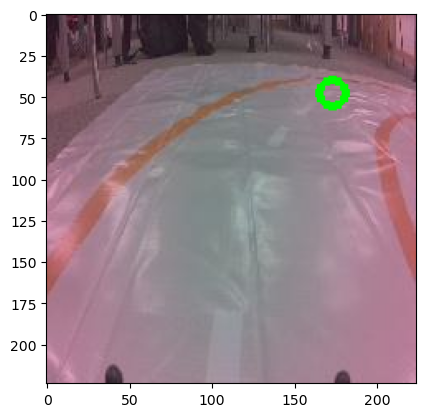

In [4]:
path = img_path[0]

# get x and y pos from image name
name = path.split("/")[-1]
x = int(name.split("_")[0])
y = int(name.split("_")[1])

# display image with x and y pos 
img = mpimg.imread(path).copy()
img = cv2.circle(img, (x, y), 8, (0, 255, 0), 3)
plt.imshow(img)

## Mouse Click 1

In [5]:
read_path = dp + "JatRacer_Images/direction/"
write_path = dp + "JatRacer_Images/relabelled/"

In [6]:
def onclick(event):
    global img_path
    global img
    
    #Get x,y of click
    x = round(event.xdata)
    y = round(event.ydata)
    
    #Save image with new x,y
    path = img_path[0]
    name = path.split("/")[-1].split("_")[-1]
    new_name = "{}_{}_{}".format(x,y,name)
    
    mpimg.imsave(write_path + new_name, img)
    
    # Clear plot
    plt.clf()
    
    if len(img_path) > 0:
        
         #Remove first instance of img_path 
        img_path = img_path[1:]
        
        #Display next image
        path = img_path[0]
        img =mpimg.imread(path)

        plt.imshow(img)
        plt.show()

In [7]:
%matplotlib tk
global img_path
global img

#Get all image paths
img_path = glob.glob(read_path + "/*.jpg")

#Load first image
path = img_path[0]
img = mpimg.imread(path)

#Add an interactive widget to figure 
fig = plt.figure(figsize=(5,5))
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(img)
plt.show()

2024-10-10 15:00:01.929 python[43765:25699530] +[IMKClient subclass]: chose IMKClient_Modern
2024-10-10 15:00:01.929 python[43765:25699530] +[IMKInputSession subclass]: chose IMKInputSession_Modern


## # Mouse Click 2

In [4]:
read_path = dp + "JatRacer_Images/direction/"
write_path = dp + "JatRacer_Images/relabelled/"

In [5]:
def onclick(event):
    global img_path
    
    # 检查点击坐标是否有效
    if event.xdata is not None and event.ydata is not None:
        x = round(event.xdata)
        y = round(event.ydata)
        
        # 读取图像
        save_img = mpimg.imread(img_path[0])
        
        # 保存新图像
        path = img_path[0]
        name = path.split("/")[-1].split("_")[-1]
        new_name = "{}_{}_{}".format(x, y, name)
        mpimg.imsave(write_path + new_name, save_img)
        
        # 清除图像
        plt.clf()
        
        # 加载下一个图像
        if len(img_path) > 0:
            img_path = img_path[1:]
            
            # 获取新的 x, y
            path = img_path[0]
            name = path.split("/")[-1]
            x = int(name.split("_")[0])
            y = int(name.split("_")[1])

            # 加载图像并画圆
            img = mpimg.imread(path).copy()  # 确保图像为可写
            img = cv2.circle(img, (x, y), 8, (0, 255, 0), 3)

            plt.imshow(img)
            plt.show()
    else:
        print("Invalid click, outside of image bounds.")


In [7]:
# 设置图形
%matplotlib tk
global img_path
global img

# 获取所有图像路径
img_path = glob.glob(read_path + "/*.jpg")

path = img_path[0]
name = path.split("/")[-1]
x = int(name.split("_")[0])
y = int(name.split("_")[1])

# 加载第一个图像并添加圆
img = mpimg.imread(path).copy()  # 确保图像副本为可写
img = cv2.circle(img, (x, y), 8, (0, 255, 0), 3)

# 添加交互式小部件
fig = plt.figure(figsize=(5,5))
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(img)
plt.show()

<IPython.core.display.Javascript object>

## Keyboard press 

In [2]:
read_path = dp + "JatRacer_Images/direction/"
write_path = dp + "JatRacer_Images/relabelled/"

In [7]:
def onpress(event):
    global img_path
    global IDs
    global labels
    
    #Get key 
    key = event.key
    print(key)
    #Get image name
    path = img_path[0]
    ID = path.split("/")[-1]
    
    
    if key not in ["left","right","d"]:
        print("Invalid Key")
    else: 
        
        if key == "left":
            IDs.append(ID)
            labels.append("left")
            
        elif key == "right":
            IDs.append(ID)
            labels.append("right")
        
        # Clear plot 
        plt.clf()

        if len(img_path) > 0: 
            
            img_path = img_path[1:]
            
            #Display next image with count 
            path = img_path[0]
            img = mpimg.imread(path)
            plt.text(0, 15, len(img_path),color='r',size=20)
            
            plt.imshow(img)
            plt.show()
            

In [10]:
%matplotlib tk
global img_path 
global IDs 
global labels
IDs = []
labels = []

#Get all image paths
img_path = glob.glob(read_path + "/*.jpg")


fig = plt.figure(figsize=(5,5))

#Load first image and add count
path = img_path[0]
img = mpimg.imread(path)
plt.text(0, 15, len(img_path),color='r',size=20)

#Add an interactive widget to figure 
cid = fig.canvas.mpl_connect('key_press_event', onpress)

plt.imshow(img)
plt.show()

right
right
left
right
right
left
left
right
left
right
shift
Invalid Key
shift+cmd
Invalid Key
cmd+2
Invalid Key


In [11]:
print(len(IDs))
labels

10


['right',
 'right',
 'left',
 'right',
 'right',
 'left',
 'left',
 'right',
 'left',
 'right']